In [241]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

XGBoost version: 2.0.3


In [242]:
np.random.seed(12345)

dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


[-31.608 -29.544   6.773   9.554] 0
[46.451 15.318 24.891 15.357] 1
[ 24.771  46.131 -49.161 -39.356] 1
[-20.13   15.641  30.981  37.218] 1
[46.465 22.369 14.248 21.745] 1


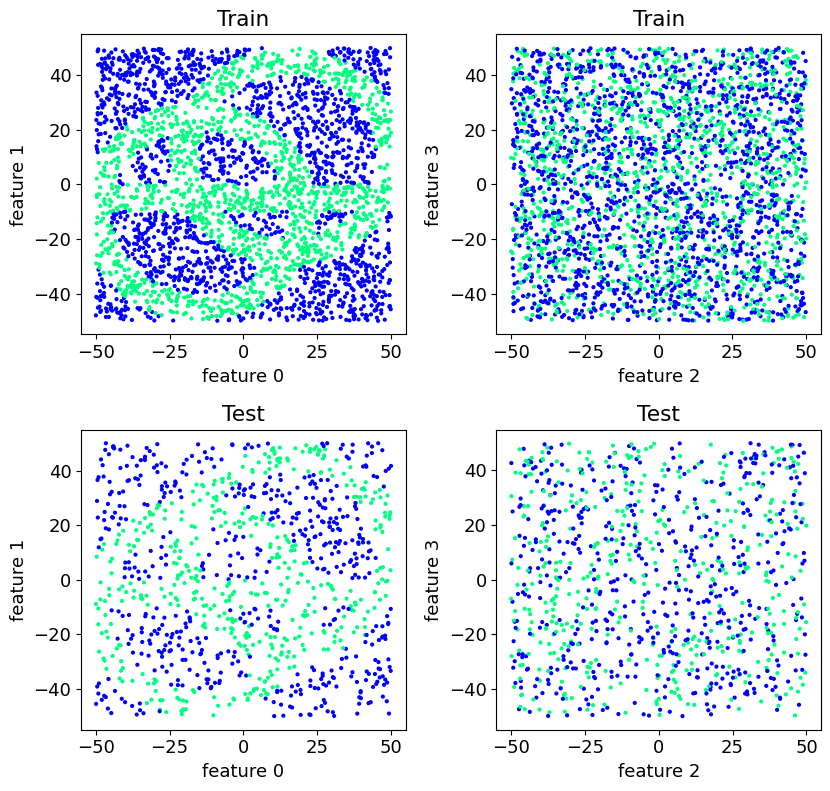

In [243]:
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

for n in range(5):
    print(x[n],y[n])

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

In [244]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test, y_test)),clf.score(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

### Classify
If the “objective” hyperparameter is left unspecified, XGBClassifier looks at the data and chooses automatically the loss functions and the evaluation metrics (--> WARNING)

## XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html

errors: 5.20%   Accuracy=0.948


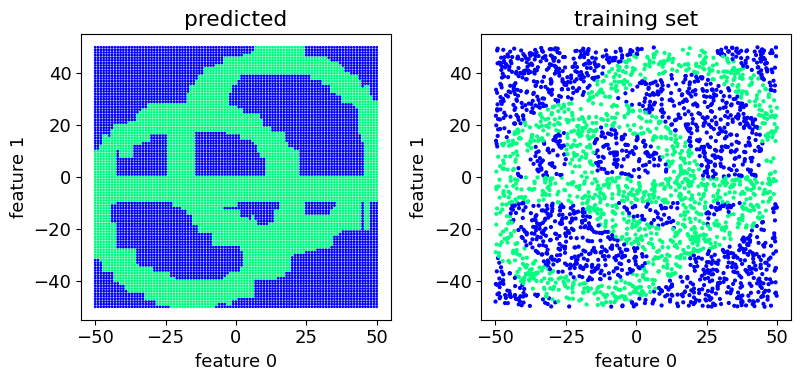

num_trees= 100


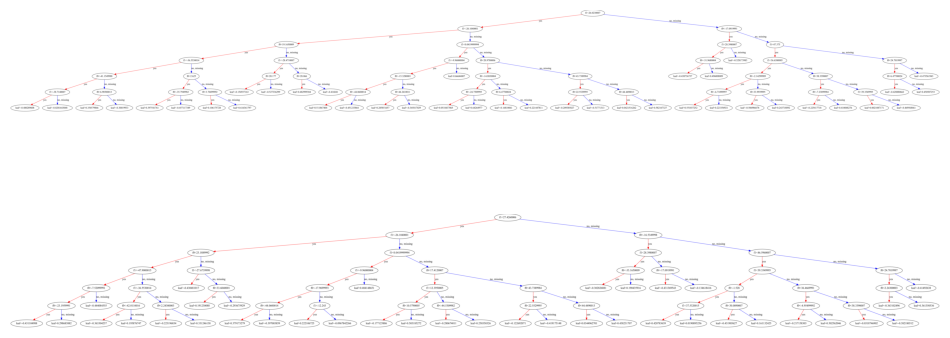

In [245]:
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

classify(model, show=True)

None
[0.4891835  0.37623835 0.06590363 0.06867457]


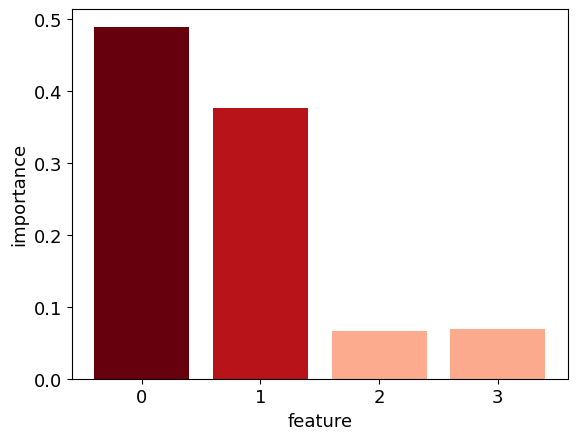

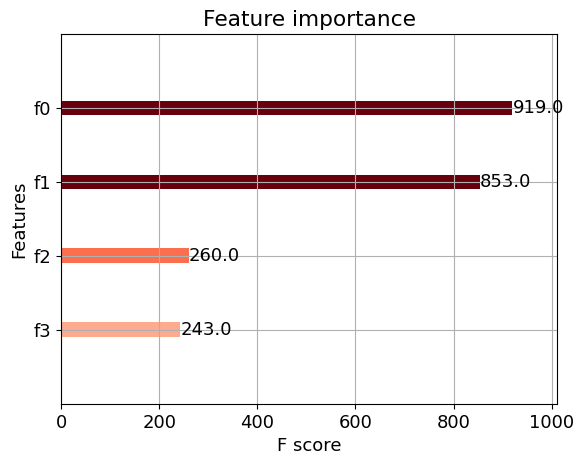

In [246]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# feature importance

print(model.importance_type)
print(model.feature_importances_)

# plot
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: 0.3 + 0.7 * (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=my_cmap(rescale(model.feature_importances_)))
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(np.arange(L))
plt.title(model.importance_type)
plt.show()

rescale_r = lambda y: 0.3 + 0.7 * (np.max(y) - y) / (np.max(y) - np.min(y))
plot_importance(model,color=my_cmap(rescale_r(model.feature_importances_)))
plt.show()

Documentation: https://xgboost.readthedocs.io/en/stable/python/python_api.html

    ‘weight’: the number of times a feature is used to split the data across all trees.

    ‘gain’: the average gain across all splits the feature is used in.

    ‘cover’: the average coverage across all splits the feature is used in.

    ‘total_gain’: the total gain across all splits the feature is used in.

    ‘total_cover’: the total coverage across all splits the feature is used in.


0 weight [919. 853. 260. 243.]
1 gain [4.56883669 3.5139606  0.61552143 0.64140123]
2 total_gain [4198.76074219 2997.40844727  160.03556824  155.86050415]
3 cover [49.8643837  66.05692291 54.26316071 54.39147949]
4 total_cover [45825.3671875  56346.5546875  14108.421875   13217.12988281]


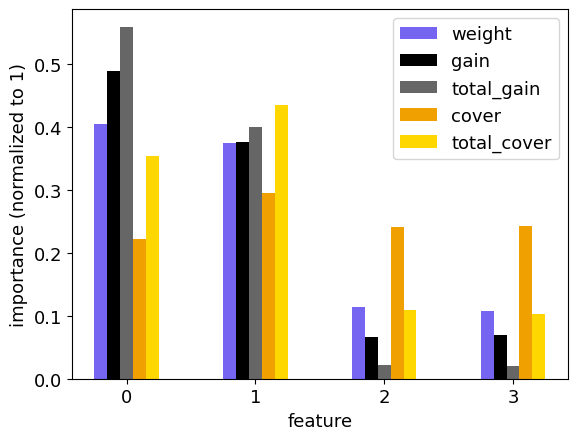

In [247]:
# if the importance type is “total_gain”, then the score is sum of loss change for each split from all trees.
list_type=["weight","gain","total_gain","cover","total_cover"]
list_col=["#7565F0","k","#666666","#F0A000","gold"]

for i,t in enumerate(list_type):
    feature_imp = model.get_booster().get_score(importance_type=t)
    keys = list(feature_imp.keys())
    values = np.array(list(feature_imp.values()))
    print(i,t,values)
    values= values/np.sum(values)
    plt.bar(np.arange(L)+(i-L/2)/10, values,color=list_col[i],width=0.1,label=t)
plt.xlabel("feature")
plt.ylabel("importance (normalized to 1)")
plt.xticks(np.arange(L))
plt.legend()
plt.show()

## normal Gradient Boosting

errors: 19.50%   Accuracy=0.805


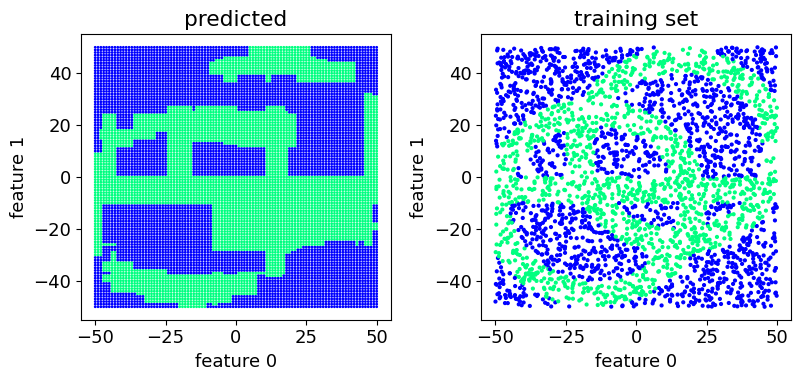

In [248]:
# GradientBoostingClassifier()
classify()

## AdaBoost

errors: 34.10%   Accuracy=0.659


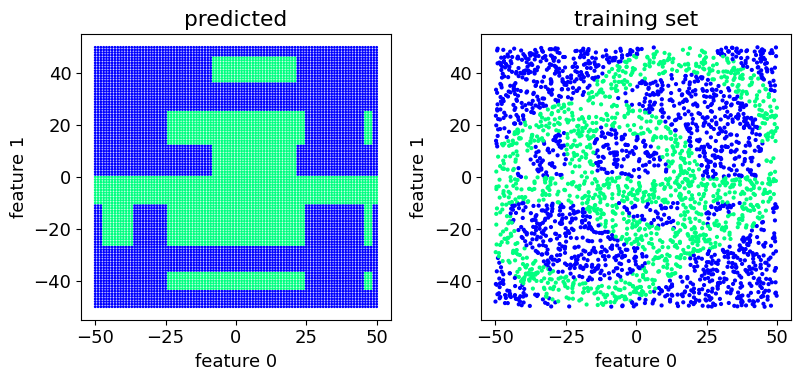

In [249]:
classify(clf=AdaBoostClassifier())

## 1.
    Model complexity, parameters’ and regularization
Try different parameters (λ, γ, n_estimators, …). Which is the simplest yet effective XGBoost model
that keeps a good validation accuracy? Is regularization useful for this analysis?

In [250]:
from sklearn.model_selection import GridSearchCV

#create XGBoost model
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

#grid search parameters
parameters = {
    'reg_lambda': [1, 10, 50],  
    'gamma': [0, 0.01, 0.1, 0.2, 0.5],  
    'n_estimators': range(60, 220, 40)  
}

#grid search
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='roc_auc', n_jobs=10, cv=10, verbose=2)
grid_result = grid_search.fit(x_train, y_train)

#store grid search results in dataframe 
results = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
                     pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
results_xgb = results.sort_values(by=['Accuracy'], ascending=False)
results_xgb = results_xgb.reset_index(drop=True)

print("The best performing combinations of parameters are: ")
print(results_xgb.head())

#check if regularization was useful
reg_lambdas = [1, 10, 50]
if grid_result.best_params_["reg_lambda"] in reg_lambdas[1:]:
    print("Regularization was useful in this analysis")
else:
    print("Regularization was not particularly useful in this analysis")

#train/test with best parameters
model = XGBClassifier(gamma=grid_result.best_params_["gamma"],
                      n_estimators=grid_result.best_params_["n_estimators"],
                      reg_lambda=grid_result.best_params_["reg_lambda"])

model.fit(x_train, y_train)
#predict on test set
predictions = model.predict(x_test)
accuracy = float(np.sum(predictions == y_test)) / y_test.shape[0]
print("Accuracy computed on test set: %f" % (accuracy))


Fitting 10 folds for each of 60 candidates, totalling 600 fits
The best performing combinations of parameters are: 
   gamma  n_estimators  reg_lambda  Accuracy
0   0.01           140           1  0.985255
1   0.01           180           1  0.985066
2   0.01           100           1  0.984427
3   0.00           140           1  0.984417
4   0.00           180           1  0.984353
Regularization was not particularly useful in this analysis
Accuracy computed on test set: 0.947000


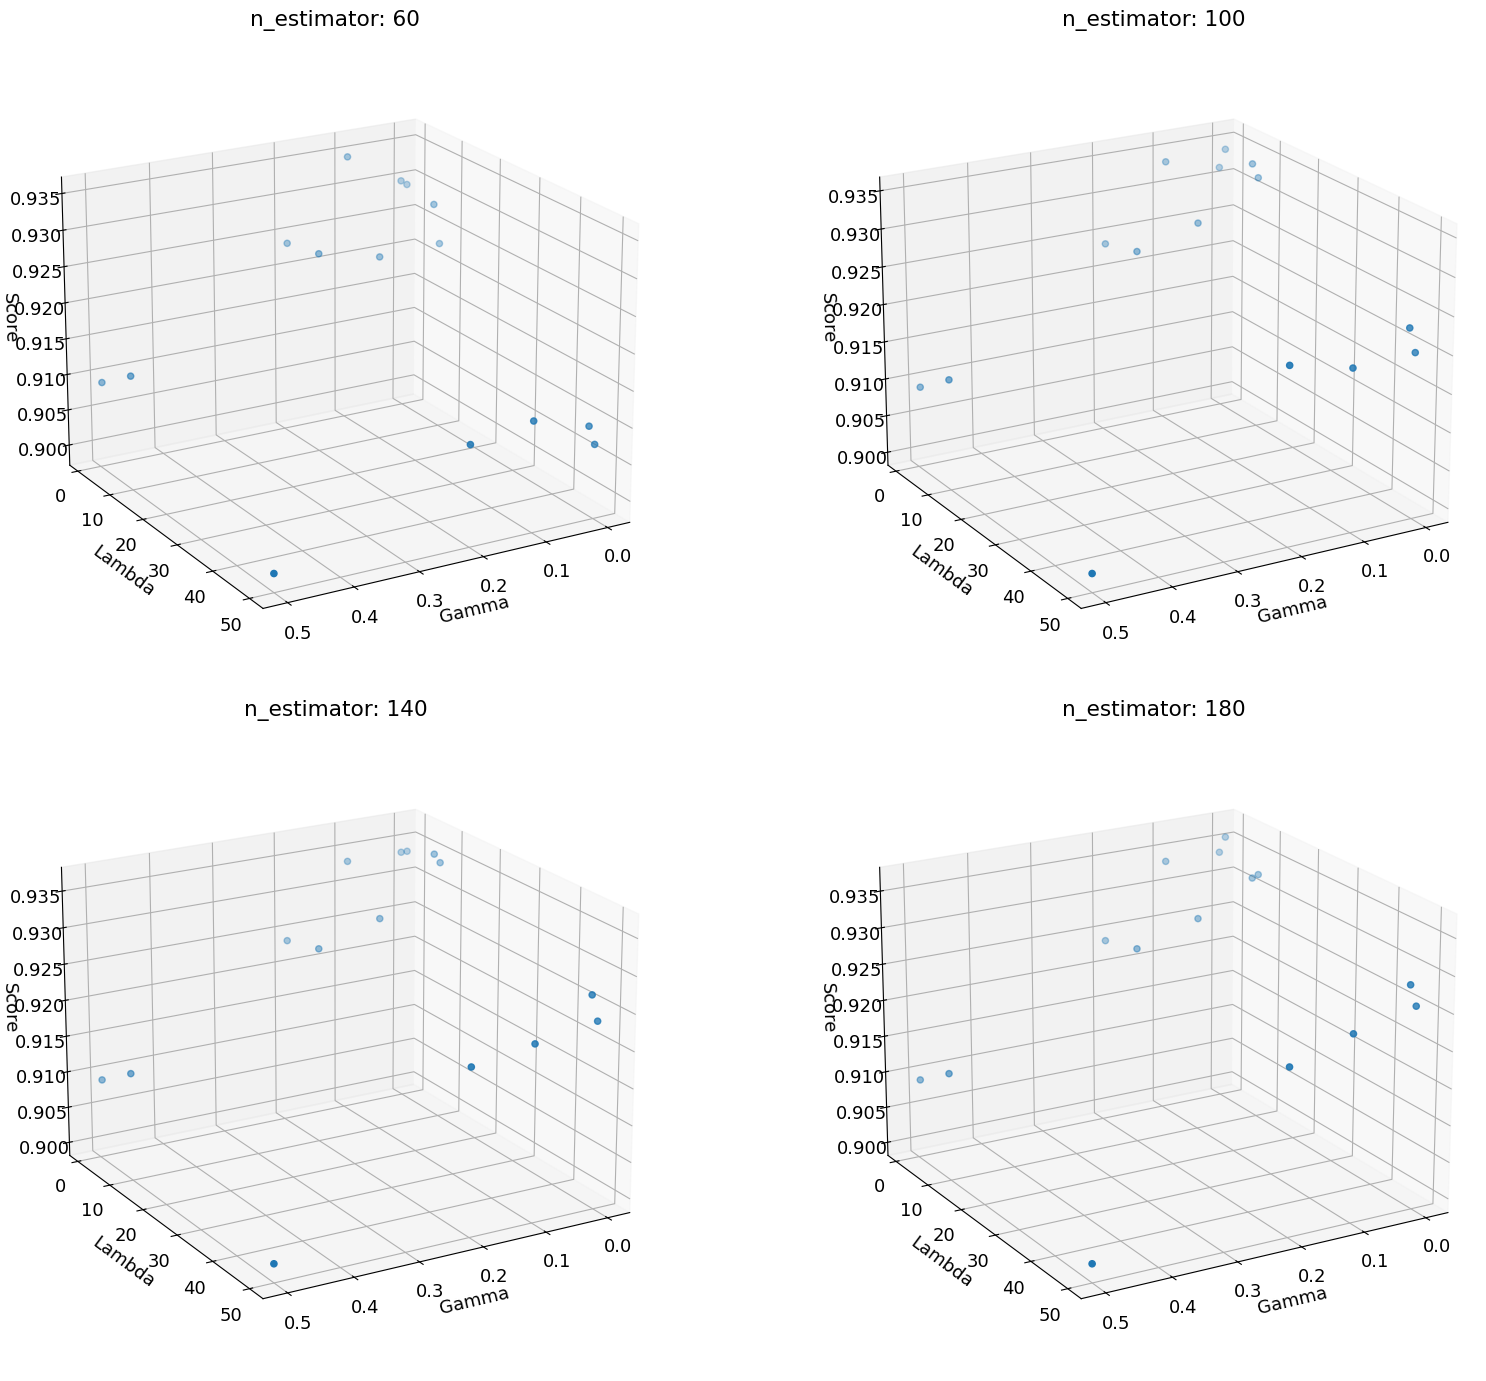

In [251]:
from mpl_toolkits.mplot3d import Axes3D

#parameter effect on performance
cv_results_df = pd.DataFrame(xgb_gscv.cv_results_)
xgb_gscv = grid_search
n_estimators_range = param_grid['n_estimators']

#3d plot

fig = plt.figure(figsize=(18, 14))

for index, n_estimator in enumerate(n_estimators_range):
    subset = cv_results_df[cv_results_df['param_n_estimators'] == n_estimator]

    ax = fig.add_subplot(2, 2, index+1, projection='3d')

    ax.scatter(subset['param_gamma'], subset['param_reg_lambda'], subset['mean_test_score'])

    ax.set_title(f'n_estimator: {n_estimator}')
    ax.set_xlabel('Gamma')
    ax.set_ylabel('Lambda')
    ax.set_zlabel('Score')
    ax.view_init(elev=20, azim=60)

plt.tight_layout()
plt.show()